<a href="https://colab.research.google.com/github/kimhwijin/TensorflowWithKeras/blob/master/Autoencoder/vanilla_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

바닐라 오토 인코더 특징 :
<br>항등 신경망과 비슷해서, 단순히 입력을 재구성해서 출력
<br>단순히 병목 계층의 유닛 개수(히든 레이어)
<br>신경망이 픽셀 수준 재구성은 추상적 특징을 학습하는지 안하는지 보장이 안된다.

In [ ]:

class Encoder(K.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = K.layers.Dense(units=hidden_dim, activation='relu')

    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation
    
class Decoder(K.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
        self.output_layer = K.layers.Dense(original_dim, activation='relu')
    
    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation

class Autoencoder(K.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim)
        self.decoder = Decoder(hidden_dim, original_dim)
    
    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed
    

In [ ]:
np.random.seed(150)
tf.random.set_seed(150)
batch_size = 256
num_epochs = 50
learning_rate = 0.01
hidden_dim = 128
original_dim = 784 #28 * 28

In [ ]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test)

In [ ]:
autoencoder = Autoencoder(hidden_dim, original_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
def loss(pred, real):
    #mean square error
    return tf.reduce_mean(tf.square(tf.subtract(pred, real)))
def train(loss, model, optimizer, original):
    with tf.GradientTape() as tape:
        pred = model(original)
        reconstruction_error = loss(pred, original)
        gradients = tape.gradient(reconstruction_error, model.trainable_variables)
        gradient_variables = zip(gradients, model.trainable_variables)
    optimizer.apply_gradients(gradient_variables)
    return reconstruction_error
def train_loop(model, optimizer, loss, dataset, epochs=20):
    for epoch in range(epochs):
        epoch_loss = 0
        for step, batch_features in enumerate(dataset):
            loss_values = train(loss, model, optimizer, batch_features)
            epoch_loss += loss_values
        model.loss.append(epoch_loss)
        print("Epoch {}/{}. loss : {}".format(epoch+1, epochs, epoch_loss.numpy()))

In [ ]:
train_loop(autoencoder, optimizer, loss, training_dataset, num_epochs)

Epoch1/50. loss : 5.1255693435668945
Epoch2/50. loss : 3.1848552227020264
Epoch3/50. loss : 3.0387356281280518
Epoch4/50. loss : 2.978508234024048
Epoch5/50. loss : 2.947870969772339
Epoch6/50. loss : 2.915058135986328
Epoch7/50. loss : 2.890587568283081
Epoch8/50. loss : 2.906430959701538
Epoch9/50. loss : 2.895946741104126
Epoch10/50. loss : 2.8724451065063477
Epoch11/50. loss : 2.881824016571045
Epoch12/50. loss : 2.8693392276763916
Epoch13/50. loss : 2.891218900680542
Epoch14/50. loss : 2.896758556365967
Epoch15/50. loss : 2.860311985015869
Epoch16/50. loss : 2.8653409481048584
Epoch17/50. loss : 2.8663458824157715
Epoch18/50. loss : 2.888202428817749
Epoch19/50. loss : 2.8709561824798584
Epoch20/50. loss : 2.870546579360962
Epoch21/50. loss : 2.862572193145752
Epoch22/50. loss : 2.872026205062866
Epoch23/50. loss : 2.8701319694519043
Epoch24/50. loss : 2.891782760620117
Epoch25/50. loss : 2.856743097305298
Epoch26/50. loss : 2.865938186645508
Epoch27/50. loss : 2.8552215099334717


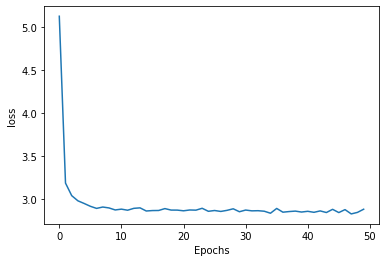

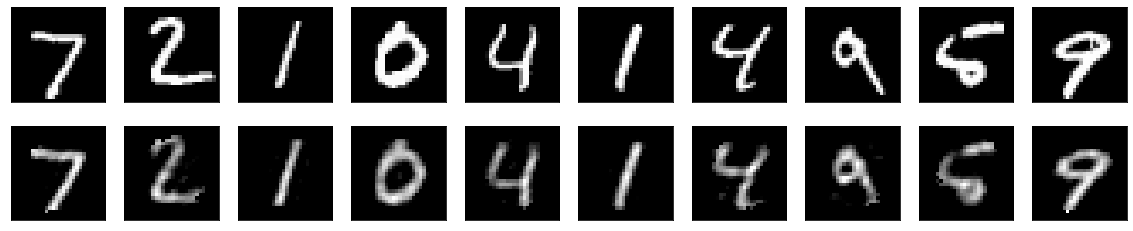

In [ ]:
plt.plot(range(num_epochs), autoencoder.loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

fig_cnt = 10
plt.figure(figsize=(20,4))
for index in range(fig_cnt):
    ax = plt.subplot(2, fig_cnt, index + 1)
    plt.imshow(x_test[index].reshape((28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, fig_cnt, index + 1 + fig_cnt)
    plt.imshow(autoencoder(x_test)[index].numpy().reshape((28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()